In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
folder = "./cut_xdqb"
corpus = []
files = os.listdir(folder)
for file in files:
    with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
        corpus.append(f.read())
corpus

['社会 文明 进程 加速 尤其 经济 增长 方式 变革 开放 运动 已经 成为 全球性 社会 发展 一股 重要 推动 力量 开放 科学 开放 创新 开放 存取 开放 数据 已经 不再 局限于 国家 行业 机构 成为 领域 跨国 致力于 发展 共同 需求 共识 尤其 互联网 技术 发展 获取信息 方式 改变 近年来 世界 各国 纷纷 兴起 大力 推进 开放 数据 运动 政府 治理 机构 管理 实践 发展 状况 来看 政府 成为 这场 运动 重要 力量 最具 代表性 国家 英国 美国 发达国家 发展中国家 奋起 急追 国际性 国家 组织 团体 开放 知识 基金会 开放 政府 基金会 开放 数据 协会 阳光 基金会 经合组织 开放 数据中心 联盟 积极参与 学术期刊 开始 加入 开放 数据 阵营 提供 论文 科研成果 数据 开放 一个 重要 根源 数据 资源 质和量 实现 前所未有 发展 人类 生活 国家 社会 发展 更是 逐渐 占据 前所未有 重要 地位 已经 成为 各国 认可 国家 基础性 战略 资源 成为 世纪 钻石矿 安全 发展 前提 发展 安全 保障 坚持 发展 安全 并重 增强 信息安全 技术 保障 能力 建立健全 安全 防护 体系 保障 信息 安全 个人隐私 促进 数据 资源 有序 流动 规范 利用 构成 包括 中国 在内 诸多 国家 数据 战略 核心内容 之一 发现 信息 数据 开放 保护 共享 安全 透明化 现代 社会 健康 发展 前进 两股 交织 互动 重要 力量 信息 资源 建设 面临 重要 课题 不论是 政府 管理 国家主权 维护 企事业 单位 运营 个人用户 生存 发展 需要 信息 交流 沟通 数据 开放 共享 需要 维护 保护 信息 数据 安全 学术 机构 关注 重点 科研成果 产出 文献 来看 数据 开放 共享 数据安全 相关 主题 研究 日益 成为 学术界 研究 热点 国内外 相关 研究成果 大量 出现 吸引 诸多 学科 领域 研究者 兴趣 仅以 中国 知网 篇名 检索 文献 为例 涉及 行政 学及 国家 行政 管理 计算机软件 计算机 应用 信息 经济 邮政 经济 宏观经济 管理 持续 发展 图书 情报 数字 图书馆 新闻 传媒 经济体制 改革 贸易 经济 金融 中国 政治 国际 政治 工业 经济 投资 证券 行政法 地方 法制 计算机

### LDA

[官方文档](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

[推荐阅读](https://www.cnblogs.com/pinard/p/6908150.html#!comments)

LDA是基于词频统计的，因此一般不用TF-IDF来做文档特征。
那么需要考虑词频归一化不？？？

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cntVector = CountVectorizer()
cntTf = cntVector.fit_transform(corpus)

print(cntTf)

  (0, 13112)	1
  (0, 3467)	1
  (0, 11944)	1
  (0, 15885)	1
  (0, 21092)	1
  (0, 14131)	1
  (0, 12317)	1
  (0, 3223)	1
  (0, 13204)	1
  (0, 4526)	1
  (0, 4789)	1
  (0, 3968)	1
  (0, 22641)	2
  (0, 6743)	1
  (0, 20152)	4
  (0, 21891)	1
  (0, 6310)	1
  (0, 23311)	2
  (0, 1472)	1
  (0, 22221)	1
  (0, 11275)	1
  (0, 12338)	3
  (0, 3126)	1
  (0, 12360)	1
  (0, 2424)	1
  :	:
  (304, 842)	1
  (304, 2178)	1
  (304, 8918)	4
  (304, 21580)	1
  (304, 6)	11
  (304, 12330)	7
  (304, 5013)	1
  (304, 19378)	1
  (304, 14435)	2
  (304, 16464)	1
  (304, 8937)	5
  (304, 12528)	2
  (304, 11720)	10
  (304, 1856)	1
  (304, 23740)	7
  (304, 3768)	2
  (304, 24031)	10
  (304, 12801)	6
  (304, 22979)	5
  (304, 5983)	2
  (304, 11358)	1
  (304, 9687)	1
  (304, 13172)	6
  (304, 9405)	2
  (304, 17761)	2


In [43]:
lda = LatentDirichletAllocation(n_topics=5)
docres = lda.fit_transform(cntTf)
print(docres)

for topic_idx, topic in enumerate(docres):
    message = "doc #%d: " % topic_idx
    message += " ".join([str(i) for i in topic.argsort()[:-1 - 1:-1]])
    print(message)
print()

d:\program files (x86)\python36-32\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
d:\program files (x86)\python36-32\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


[[  3.46930618e-04   9.51275761e-01   3.46264548e-04   4.76880411e-02
    3.43002620e-04]
 [  7.68293833e-01   7.08531752e-05   7.13669877e-05   7.10692051e-05
    2.31492877e-01]
 [  1.98093521e-02   1.14600609e-04   8.76111889e-01   1.03851243e-01
    1.12914938e-04]
 ..., 
 [  9.99642813e-01   8.93515575e-05   9.02446270e-05   8.92662924e-05
    8.83244386e-05]
 [  9.99627585e-01   9.38770079e-05   9.33827108e-05   9.35507131e-05
    9.16045197e-05]
 [  9.99757658e-01   6.06754068e-05   6.07489428e-05   6.06627158e-05
    6.02546315e-05]]
doc #0: 1
doc #1: 0
doc #2: 2
doc #3: 0
doc #4: 0
doc #5: 2
doc #6: 4
doc #7: 2
doc #8: 0
doc #9: 0
doc #10: 2
doc #11: 2
doc #12: 0
doc #13: 1
doc #14: 0
doc #15: 2
doc #16: 1
doc #17: 2
doc #18: 2
doc #19: 2
doc #20: 2
doc #21: 1
doc #22: 1
doc #23: 2
doc #24: 1
doc #25: 0
doc #26: 0
doc #27: 1
doc #28: 0
doc #29: 3
doc #30: 1
doc #31: 0
doc #32: 0
doc #33: 2
doc #34: 0
doc #35: 0
doc #36: 1
doc #37: 0
doc #38: 0
doc #39: 1
doc #40: 2
doc #41: 1


In [34]:
# 主题-词汇矩阵
print(lda.components_)
print('主题数', len(lda.components_))
print('词汇数', len(lda.components_[0]))



[[ 0.71097548  0.35772931  0.39887533 ...,  0.30326989  0.31886097
   0.33256786]
 [ 2.79342317  0.56934866  1.97040554 ...,  1.29236317  0.94317511
   0.91947519]
 [ 0.3652365   0.3342151   0.34921735 ...,  0.38252222  0.33056106
   0.34366048]
 [ 2.37596528  0.32280175  0.37363171 ...,  2.61001556  0.35515702
   0.40220073]
 [ 2.87065551  2.5605409   4.93992715 ...,  0.34364345  0.37613716
   0.37123697]]
主题数 5
词汇数 24522


In [23]:
feature_names = cntVector.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    message = "Topic #%d: " % topic_idx
    message += " ".join([feature_names[i]
                         for i in topic.argsort()[:-20 - 1:-1]])
    print(message)
print()

Topic #0: 知识 指数 评论 微博 存量 追加 政务 转发 设计 团队 概念设计 消费者 日均 初次 整合 影响力 间隔 过程 转移 主体
Topic #1: 信息 研究 用户 影响 知识 数据 进行 网络 行为 模型 服务 通过 理论 分析 使用 政府 因素 智库 创新 发展
Topic #2: 信息 智库 影响 用户 研究 资源 图书馆 传播 数据 技术 感知 进行 质量 模型 通过 分析 知识 学科 社会 聚合
Topic #3: 舆情 网络 节点 指标 合作 进行 传播 信息 事件 模型 评价 影响 竞争 企业 口碑 情报 通过 分析 预测 权重
Topic #4: 研究 图书馆 数据 信息 服务 文献 进行 用户 学科 领域 分析 论文 合作 机构 资源 发展 技术 期刊 科研 通过



### 计算TF-IDF

In [25]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X

<305x24522 sparse matrix of type '<class 'numpy.float64'>'
	with 207053 stored elements in Compressed Sparse Row format>

In [26]:
feature_names = vectorizer.get_feature_names()
feature_names

['一一',
 '一一列举',
 '一一对应',
 '一三五',
 '一下',
 '一两千',
 '一个',
 '一个三层',
 '一个个',
 '一个多',
 '一个点',
 '一个组',
 '一个集',
 '一中',
 '一串',
 '一为',
 '一义',
 '一书',
 '一书中',
 '一事',
 '一二',
 '一二十年',
 '一人',
 '一代',
 '一件',
 '一份',
 '一位',
 '一体',
 '一体化',
 '一作',
 '一元',
 '一共',
 '一再',
 '一再强调',
 '一刀切',
 '一分为二',
 '一切都是',
 '一划',
 '一列',
 '一则',
 '一劳永逸',
 '一区',
 '一半',
 '一半左右',
 '一反',
 '一口',
 '一句',
 '一只',
 '一可生',
 '一号',
 '一同',
 '一名',
 '一向',
 '一员',
 '一周',
 '一味',
 '一品',
 '一国',
 '一场',
 '一块',
 '一堆',
 '一大',
 '一大批',
 '一大步',
 '一大部分',
 '一天',
 '一头',
 '一套',
 '一定',
 '一定量',
 '一审',
 '一审判决',
 '一家',
 '一家之言',
 '一对',
 '一对一',
 '一封',
 '一封信',
 '一小部分',
 '一层',
 '一届',
 '一己',
 '一带',
 '一席之地',
 '一幅',
 '一年',
 '一年一度',
 '一年级',
 '一并',
 '一度',
 '一座',
 '一张',
 '一律',
 '一心',
 '一成不变',
 '一所',
 '一扇门',
 '一手',
 '一扬',
 '一批',
 '一技之长',
 '一把',
 '一抑',
 '一护',
 '一探',
 '一揽子',
 '一支',
 '一整套',
 '一文',
 '一新',
 '一方',
 '一方面',
 '一族',
 '一日',
 '一时',
 '一时冲动',
 '一时期',
 '一时间',
 '一昧',
 '一是',
 '一有',
 '一朝一夕',
 '一期',
 '一本',
 '一束',
 '一条',
 '一枝独秀',
 '一栋',
 '一栏',
 '一样',
 '一案',
 '一桌',
 '一档',
 '一棵',

In [4]:
doc_item_mat = X.toarray()
rows,cols = np.shape(doc_item_mat)
key_words = []
for row_index, row in enumerate(doc_item_mat):
#     print('No.',row_index)
    key_words.append([feature_names[i] for i in row.argsort()[:-21:-1]])

In [5]:
word_dict = dict()
for i in key_words:
    for j in i:
        if j in word_dict.keys():
            word_dict[j] += 1
        else:
            word_dict[j] = 1
sorted(word_dict.items(), key=lambda x:x[1], reverse=True)[:20]

[('研究', 115),
 ('信息', 95),
 ('用户', 85),
 ('数据', 63),
 ('影响', 58),
 ('服务', 54),
 ('进行', 54),
 ('图书馆', 50),
 ('网络', 48),
 ('知识', 42),
 ('文献', 38),
 ('模型', 35),
 ('资源', 35),
 ('政府', 34),
 ('行为', 33),
 ('机构', 31),
 ('指标', 30),
 ('论文', 30),
 ('高校', 29),
 ('舆情', 29)]

In [28]:
from sklearn.cluster import KMeans
from sklearn import metrics

clsuter_score = {}
for i in range(2,7):
    y_pred = KMeans(n_clusters=i, random_state=9).fit_predict(X)
    score = metrics.calinski_harabaz_score(X.toarray(), y_pred)
    clsuter_score[i] = score
clsuter_score

{2: 9.5339135095286967,
 3: 8.3428598467859487,
 4: 7.6535364724863255,
 5: 7.5247179381562805,
 6: 7.0820204886891354}

In [7]:
# 计算的轮廓系数越来越大，也就是分类越多越好。。。有点尴尬
for i in range(2,50):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    km.fit(X)
    # 轮廓系数
    print(metrics.silhouette_score(X, km.labels_, metric='euclidean'))

0.0289796526801
0.0309767151578
0.0432609842953
0.0448771182113
0.0447277606299
0.0512141315513
0.053666713459
0.0535773469273
0.0551936939527
0.0570830176133
0.0604808268705
0.0578246255982
0.0525936522212
0.0577966405944
0.0621345651992
0.0590022811067
0.0581566462468
0.0558404901242
0.054193754619
0.0596470824767
0.056370586086
0.0633673537941
0.0647043954907
0.0650724488805
0.0660533233578
0.0626001174312
0.061996956613
0.071391158983
0.0685297928272
0.0693192589659
0.0628390492135
0.0672243162322
0.0719270003387
0.0653014932835
0.0712836320907
0.0651619175994
0.0626178002271
0.0725999505317
0.0674881756626
0.0791086801438
0.0690044311935
0.0671238544942
0.0695739409643
0.0729370590796
0.0696526854851
0.0644113750513
0.0675101068004
0.0823642559881


In [29]:
true_k = 5
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
km.fit(X)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: 智库 信息 高校 服务 联盟 情报服务 研究 资源 图书馆 建设 科技 知识 提供 创新 影响力 情报机构 用户 决策 协同 传播
Cluster 1: 用户 信息 图书馆 数据 服务 研究 影响 进行 行为 政府 模型 开放 资源 感知 移动 使用 微信 健康 技术 平台
Cluster 2: 研究 期刊 论文 学科 关键词 数据 文献 合作 机构 领域 指标 学术 进行 科研 网络 主题 引文 评价 分析 指数
Cluster 3: 知识 共享 社区 团队 虚拟社区 用户 成员 研究 创新 交流 真人 进行 健康 网络 图谱 影响 中医药 存量 微博 服务
Cluster 4: 舆情 网络 事件 网民 传播 政府 信息 谣言 观点 微博 突发事件 热度 治理 演化 危机 回应 政治 社会 进行 监测


In [9]:
# 轮廓系数
print(metrics.silhouette_score(X, km.labels_, metric='euclidean'))

0.057532397645


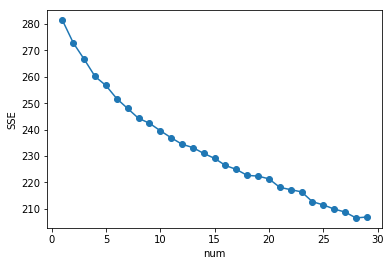

In [12]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1,30):
    km = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    #获取K-means算法的SSE
    distortions.append(km.inertia_)
#绘制曲线
plt.plot(range(1,30),distortions,marker="o")
plt.xlabel("num")
plt.ylabel("SSE")
plt.show()

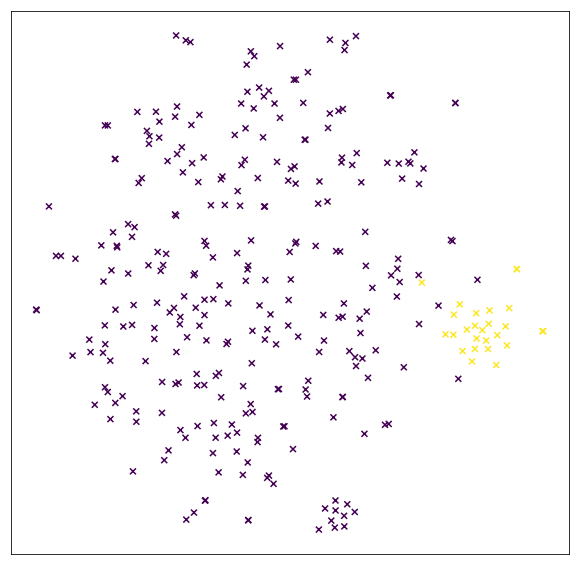

In [20]:
# 使用T-SNE算法，对权重进行降维，准确度比PCA算法高，但是耗时长
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

true_k = 2
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
km.fit(X)

tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(X.toarray())

x = []
y = []

for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=km.labels_, marker="x")
plt.xticks(())
plt.yticks(())
plt.show()
# plt.savefig('./sample.png', aspect=1)

## 查看每个文本所属簇

In [ ]:
y = km.fit_predict(X)

In [ ]:
y

In [ ]:
result = {}
for text_idx, label_idx in enumerate(y):
    if label_idx not in result:
        result[label_idx] = [text_idx]
    else:
        result[label_idx].append(text_idx)
result

## DBSCAN密度聚类

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
def pca(weights, n_components=100):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(weights)
pca_weights = pca(X.toarray())
pca_weights

In [ ]:
clf = DBSCAN(eps=0.9, min_samples=5)
y = clf.fit_predict(pca_weights)
plt.scatter(pca_weights[:, 0], pca_weights[:, 1], c=y)
plt.show()

In [ ]:
result = {}
for text_idx, label_idx in enumerate(y):
    if label_idx not in result:
        result[label_idx] = [text_idx]
    else:
        result[label_idx].append(text_idx)
result